# MChem Project Programme

In [106]:
from rdkit import Chem
from rdkit import RDConfig
from rdkit.Chem.rdMolDescriptors import GetUSRCAT, GetUSRScore
from rdkit.Chem import Descriptors, AllChem, Draw, PandasTools, rdMolAlign
import pandas as pd
import os
import numpy as np

### GetUSRCAT for .sdf provided (Step 2)

In [107]:
QK9mols = Chem.SDMolSupplier('9QK_Ideal.sdf')
m1 = QK9mols[0]

In [108]:
print(Chem.MolToMolBlock(m1))

9QK
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
   -3.8420    1.8020    0.0120 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0620   -1.1770   -0.0040 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.6680    2.1030    0.0070 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2060    3.3630   -0.1020 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.7230    0.9660    0.0040 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2400   -1.4640   -0.0070 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6900   -2.7980   -0.0120 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0250   -3.0600   -0.0140 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9610   -2.0270   -0.0100 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5620   -0.7230   -0.0040 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1970   -0.4180   -0.0030 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3500    1.1690    0.0050 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5100    0.0610    0.0020 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9750    0.2920  

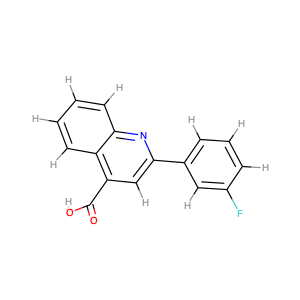

In [109]:
Chem.AddHs(m1) 
AllChem.EmbedMolecule(m0_3D)
AllChem.UFFOptimizeMolecule(m0_3D) # Improves the quality of the conformation; this step should not be necessary since v2018.09: default conformations use ETKDG
Draw.MolToImage(m0_3D)

In [110]:
m0_mom = GetUSRCAT(m0_3D)

RDKit WARNING: [18:12:05] WARNING: not removing hydrogen atom without neighbors


,ID,ROMol
0,1543,
1,8593,
2,57030,
3,94721,
4,96891,
...,...,...
3097,145387354,
3098,145387356,
3099,145651521,
3100,145821287,

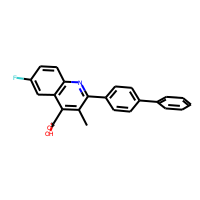
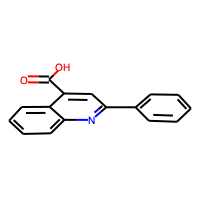
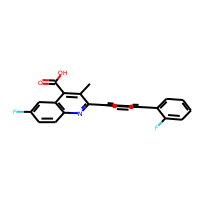
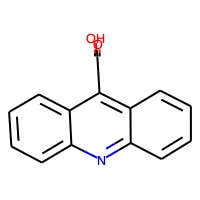
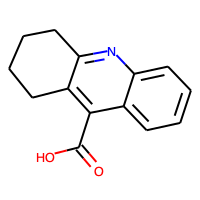
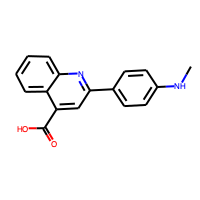
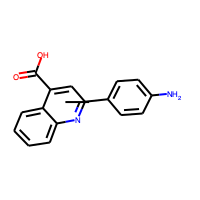
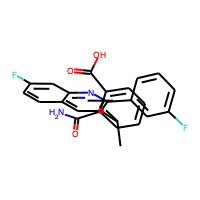
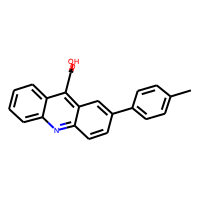
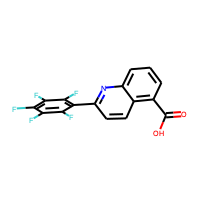

In [111]:
fulldf = PandasTools.LoadSDF('Filtered_Data.sdf')

fulldf

#the .sdf file must be the in following directory to be referenced correctly:
#"/Users/[your profile]/anaconda3/envs/teachopencadd/share/RDKit/Data/Filtered_Data.sdf"

In [112]:
#takes the ROMol column of the df and makes a list which can be used to generate USRCAT Moments
mols = list(fulldf['ROMol'])

In [113]:
USRCAT_Mom = []
for i in range(len(mols)):
    mom = GetUSRCAT(mols[i])
    USRCAT_Mom.append(mom)

In [114]:
USRCAT_Score = []
for i in range(len(USRCAT_Mom)):
    Score = GetUSRScore(m0_mom, USRCAT_Mom[i])
    USRCAT_Score.append(Score)

In [115]:
fulldf['USRCAT_Mom'] = USRCAT_Mom 

In [116]:
fulldf['USRCAT_Score'] = USRCAT_Score

,ID,ROMol,USRCAT_Mom,USRCAT_Score
0,1543,,"[4.104422923443122, 1.9681844622934566, 0.4687...",0.188206
1,8593,,"[3.0091617058258175, 1.2554551186744434, -0.58...",0.300893
2,57030,,"[4.178482600212633, 1.9425038106497095, -0.362...",0.206755
3,94721,,"[2.537562420232774, 0.9436604344796474, -0.653...",0.192832
4,96891,,"[2.551952920342177, 0.951663743811002, -0.6805...",0.187149
...,...,...,...,...
3097,145387354,,"[3.364960815118464, 1.567651109222212, 0.30562...",0.278359
3098,145387356,,"[2.9599459324417383, 1.515795874243247, 0.3599...",0.260637
3099,145651521,,"[2.627892648105335, 1.3265635825264799, 0.6880...",0.217984
3100,145821287,,"[3.529850144249131, 1.6138884038877728, 0.6139...",0.246873

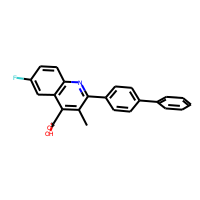
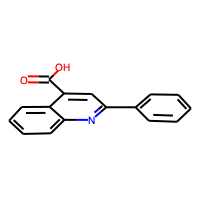
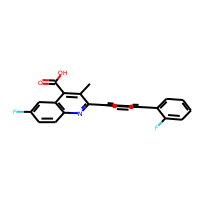
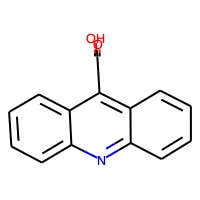
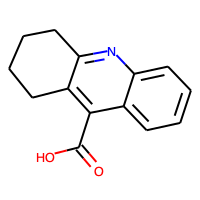
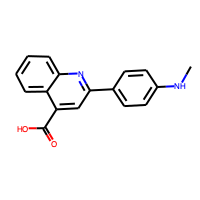
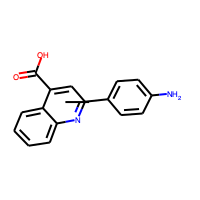
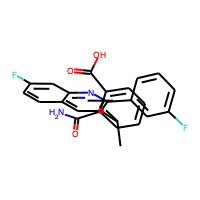
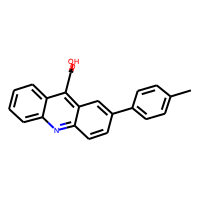
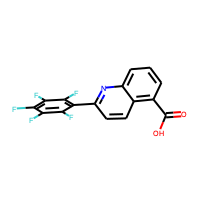

In [117]:
fulldf

In [118]:
fulldf = fulldf.sort_values('USRCAT_Score', ascending=False)

In [119]:
fulldf = fulldf.reset_index(drop = True)
#resets the index so the dataframe is updated with high-to-low values of USRCAT_Score, 0 being the highest and 9 the lowest.

,ID,ROMol,USRCAT_Mom,USRCAT_Score
0,3897431,,"[3.210859332544041, 1.3470320341460558, -0.484...",0.493232
1,80205762,,"[3.291499564559724, 1.4303077133348403, -0.600...",0.491369
2,11667174,,"[3.28650101627734, 1.4197655765743054, -0.5761...",0.488656
3,4678832,,"[3.309875105338848, 1.4154014641486359, 0.3498...",0.469597
4,135399143,,"[3.180111244432967, 1.4076910385027694, -0.317...",0.466144
...,...,...,...,...
3097,102499562,,"[5.036792175704948, 2.366912521511905, -0.4317...",0.108067
3098,67625000,,"[5.508028270079991, 2.5696883713055825, -0.547...",0.106677
3099,144540197,,"[5.162403274563886, 2.510532873736351, 0.18037...",0.096741
3100,4006106,,"[5.886652356294538, 2.7097191581588986, -0.753...",0.088460

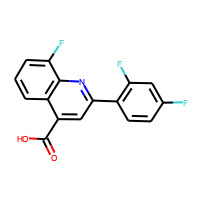
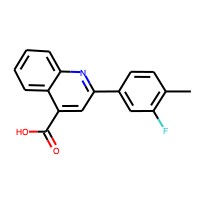
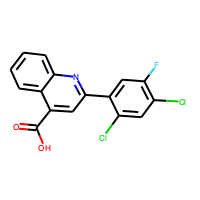
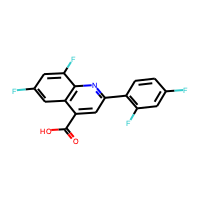
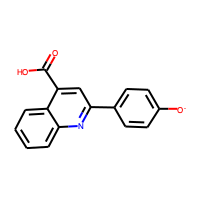
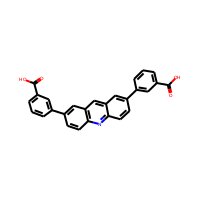
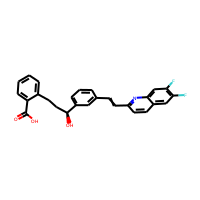
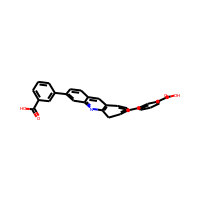
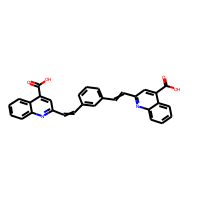
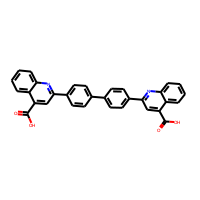

In [120]:
fulldf

In [121]:
subdf = fulldf[0:5]

,ID,ROMol,USRCAT_Mom,USRCAT_Score
0,3897431,,"[3.210859332544041, 1.3470320341460558, -0.484...",0.493232
1,80205762,,"[3.291499564559724, 1.4303077133348403, -0.600...",0.491369
2,11667174,,"[3.28650101627734, 1.4197655765743054, -0.5761...",0.488656
3,4678832,,"[3.309875105338848, 1.4154014641486359, 0.3498...",0.469597
4,135399143,,"[3.180111244432967, 1.4076910385027694, -0.317...",0.466144

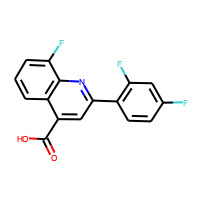
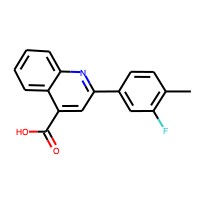
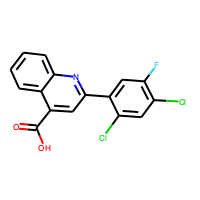
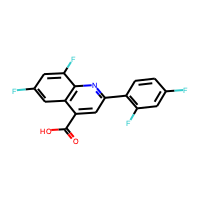
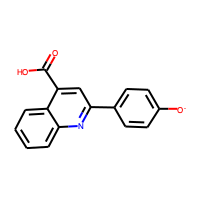

In [122]:
subdf

In [123]:
#Save structures to SDF
PandasTools.WriteSDF(subdf, 'Top_5_Ligands.sdf', molColName='ROMol', properties=None, allNumeric=False)


,ID,ROMol
0,3897431,
1,80205762,
2,11667174,
3,4678832,
4,135399143,

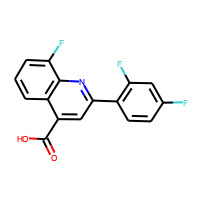
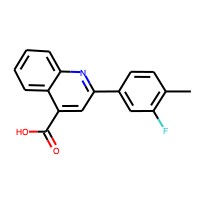
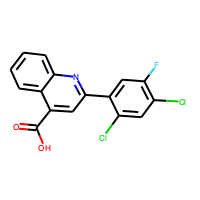
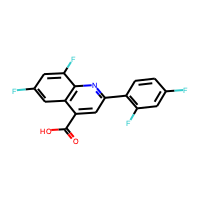
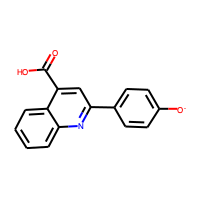

In [124]:
finaldf = PandasTools.LoadSDF('Top_5_Ligands.sdf')

finaldf

### Alignment of Co-Ordinates of Query Molecule for OpenMM studies (Step 3)

In [125]:
mols = []
mols.append(m1)

In [126]:
print(Chem.MolToMolBlock(mols[0]))

9QK
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
   -3.8420    1.8020    0.0120 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0620   -1.1770   -0.0040 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.6680    2.1030    0.0070 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2060    3.3630   -0.1020 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.7230    0.9660    0.0040 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2400   -1.4640   -0.0070 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6900   -2.7980   -0.0120 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0250   -3.0600   -0.0140 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9610   -2.0270   -0.0100 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5620   -0.7230   -0.0040 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1970   -0.4180   -0.0030 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3500    1.1690    0.0050 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5100    0.0610    0.0020 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9750    0.2920  

In [127]:
suppl = Chem.SDMolSupplier('Top_5_Ligands.sdf')
for mol in suppl:
    mols.append(mol) 
    
#SDF of the query molecule (for molecular alignment you want a list of molecules with a 
#Query in first poisiton and the rest 1 -> n)

In [128]:
for probeMol in mols[1:]:
    print(Chem.MolToMolBlock(probeMol))

3897431
     RDKit          3D

 22 24  0  0  0  0  0  0  0  0999 V2000
   -4.2519    1.1439    0.1032 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6264   -0.0513   -0.0979 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2508   -0.0834   -0.0993 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5325    1.0580    0.0965 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1849    2.2525    0.2973 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5603    2.3148    0.3039 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4470    3.3722    0.4896 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1717    0.9879    0.0885 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.4982   -0.1592   -0.1043 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2434   -1.3046   -0.3009 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6211   -1.2919   -0.3027 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4065   -2.5145   -0.5125 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8611   -3.6233   -0.6991 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7806   -2.43

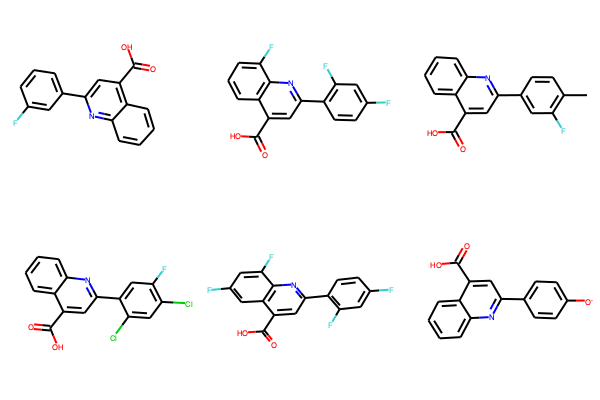

In [129]:
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200, 200), legends=None, highlightAtomLists=None, highlightBondLists=None, useSVG=False)

In [130]:
#This is the section which calculates the alignment
refMol = mols[0] #We would set this to the ligand already bound to the protein (query)
score_list = []
for probeMol in mols[1:]:
    pyO3A = rdMolAlign.GetO3A(probeMol, refMol)
    score = pyO3A.Align()
    score_list.append(score)
print(score_list)

[0.10120774069521377, 0.09275710244502682, 0.06294041547087925, 0.09884963172682229, 0.0996659230083693]


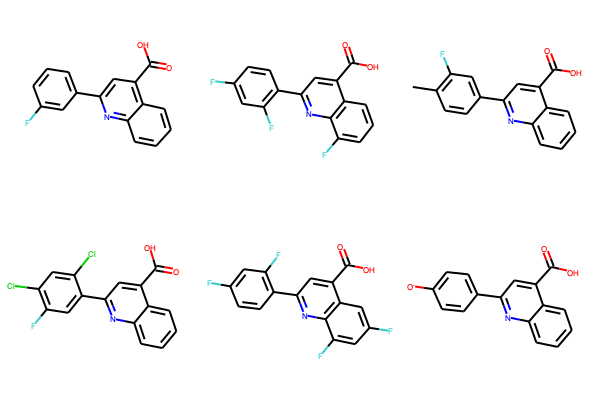

In [131]:
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200, 200), legends=None, highlightAtomLists=None, highlightBondLists=None, useSVG=False)

#Printed twice to show that the coordinates have changed and the alignment has worked correctly.

In [132]:
for probeMol in mols[1:]:
    print(Chem.MolToMolBlock(probeMol))

3897431
     RDKit          3D

 22 24  0  0  0  0  0  0  0  0999 V2000
    3.9788   -1.8666    0.0040 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5168   -0.5834    0.0034 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1572   -0.3722    0.0022 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2938   -1.4266    0.0014 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7826   -2.7127    0.0019 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1381   -2.9542    0.0033 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9027   -3.7427    0.0013 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0461   -1.1792    0.0001 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5585    0.0615   -0.0005 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3285    1.1169    0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6928    0.9250    0.0015 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6334    2.0523    0.0023 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2394    3.2383    0.0019 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.9859    1.79

In [133]:
fin = open("5OBJ-1.pdb", "w")
probeMol = mols[1]
pdbblock = Chem.MolToPDBBlock(probeMol)
fin.write(pdbblock)
fin.close()

In [134]:
for probeMol in mols[2:]:
    print(Chem.MolToMolBlock(probeMol))

80205762
     RDKit          3D

 21 23  0  0  0  0  0  0  0  0999 V2000
   -6.2636    0.9346   -0.0058 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7790    0.7127   -0.0044 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8826    1.7625   -0.0036 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5308    1.5707   -0.0023 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0075    0.2963   -0.0017 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8802   -0.7645   -0.0024 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2332   -0.5522   -0.0038 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5482    0.0903   -0.0003 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0765   -1.1590    0.0002 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2686   -1.4007    0.0015 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7613   -2.6858    0.0021 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1098   -2.9732    0.0034 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9833   -1.9130    0.0043 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5308   -0.6

In [135]:
fin = open("5OBJ-2.pdb", "w")
probeMol = mols[2]
pdbblock = Chem.MolToPDBBlock(probeMol)
fin.write(pdbblock)
fin.close()

In [136]:
for probeMol in mols[3:]:
    print(Chem.MolToMolBlock(probeMol))

11667174
     RDKit          3D

 22 24  0  0  0  0  0  0  0  0999 V2000
    3.9400   -1.9480    0.0050 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0603   -3.0049    0.0013 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7200   -2.7386   -0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2882   -1.4263    0.0022 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1700   -0.3578    0.0059 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5081   -0.6440    0.0073 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7077    0.9364    0.0081 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3431    1.1261    0.0065 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5425    0.0695    0.0028 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0431   -1.1616    0.0008 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0038    0.2921    0.0011 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8698   -0.7824   -0.0027 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2280   -0.5722   -0.0042 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7243    0.7

In [137]:
fin = open("5OBJ-3.pdb", "w")
probeMol = mols[3]
pdbblock = Chem.MolToPDBBlock(probeMol)
fin.write(pdbblock)
fin.close()

In [138]:
for probeMol in mols[4:]:
    print(Chem.MolToMolBlock(probeMol))

4678832
     RDKit          3D

 23 25  0  0  0  0  0  0  0  0999 V2000
   -4.2292   -0.5851   -0.0037 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8699   -0.7536   -0.0026 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0102    0.3234   -0.0018 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5210    1.5832   -0.0021 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8915    1.7612   -0.0033 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7456    0.6811   -0.0041 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0796    0.9135   -0.0052 F   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6869    2.6621   -0.0013 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5524    0.1204   -0.0005 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0590   -1.1373   -0.0002 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2615   -1.3897    0.0010 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1691   -0.3604    0.0019 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5380   -0.6386    0.0031 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0204   -1.93

In [139]:
fin = open("5OBJ-4.pdb", "w")
probeMol = mols[4]
pdbblock = Chem.MolToPDBBlock(probeMol)
fin.write(pdbblock)
fin.close()

In [140]:
for probeMol in mols[5:]:
    print(Chem.MolToMolBlock(probeMol))

135399143
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
    3.9551   -1.9450    0.0016 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0611   -2.9904    0.0007 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7241   -2.7138    0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2587   -1.3938    0.0004 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1506   -0.3646    0.0012 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5066   -0.6425    0.0018 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6941    0.9558    0.0015 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3388    1.2004    0.0009 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5216    0.1297    0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0596   -1.1300   -0.0001 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9868    0.3187   -0.0006 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5547    1.5751   -0.0004 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9230    1.7235   -0.0011 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7823    0.

In [141]:
fin = open("5OBJ-5.pdb", "w")
probeMol = mols[5]
pdbblock = Chem.MolToPDBBlock(probeMol)
fin.write(pdbblock)
fin.close()